## load params and data, create and split Datasets, set checkpoint, init models, set trainer, train, save best model and metric path 

Loading data from: datasets/numpy/ssvep_5_nofilter_GMCGA_no01_4labels.npz
Data loaded: X=(1163, 8, 500), y=(1163,)


Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                      | Params | Mode 
----------------------------------------------------------------
0 | criterion | CrossEntropyLoss          | 0      | train
1 | train_acc | MulticlassAccuracy        | 0      | train
2 | val_acc   | MulticlassAccuracy        | 0      | train
3 | test_acc  | MulticlassAccuracy        | 0      | train
4 | test_cm   | MulticlassConfusionMatrix | 0      | train
5 | tcn       | Sequential                | 10.4 K | train
6 | head      | Linear                    | 132    | train
----------------------------------------------------------------
10.5 K    Trainable params
0         Non-trainable params
10.5 K    Total params
0.042     Total estimated model params size (MB)
19        Modules in train mode
0         Modules in eval mode


Dataset split: Train=814, Val=174, Test=175
Dataloaders ready

Training TCNModel_withBase...



Time limit reached. Elapsed time is 1:00:00. Signaling Trainer to stop.


Best model saved at: logs/TCNModel_withBase/version_12/checkpoints/best-11408-val_acc=0.948.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Class 10.5 accuracy: 1.000
Class 12 accuracy: 0.891
Class 15.2 accuracy: 0.958
Class 18.1 accuracy: 0.944


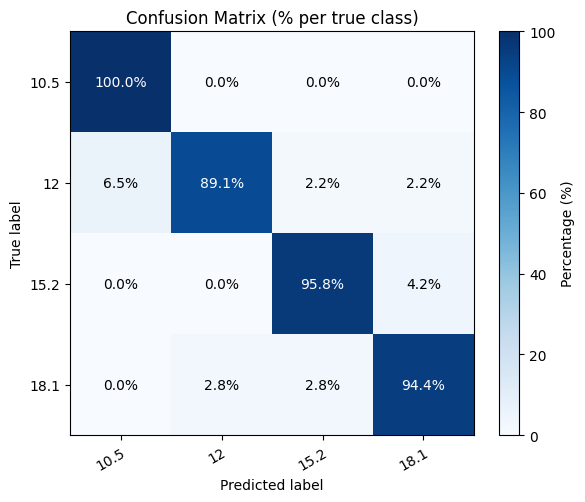

TCNModel_withBase: Test accuracy = 0.949

Plotting TCNModel_withBase: Test Accuracy = 0.949


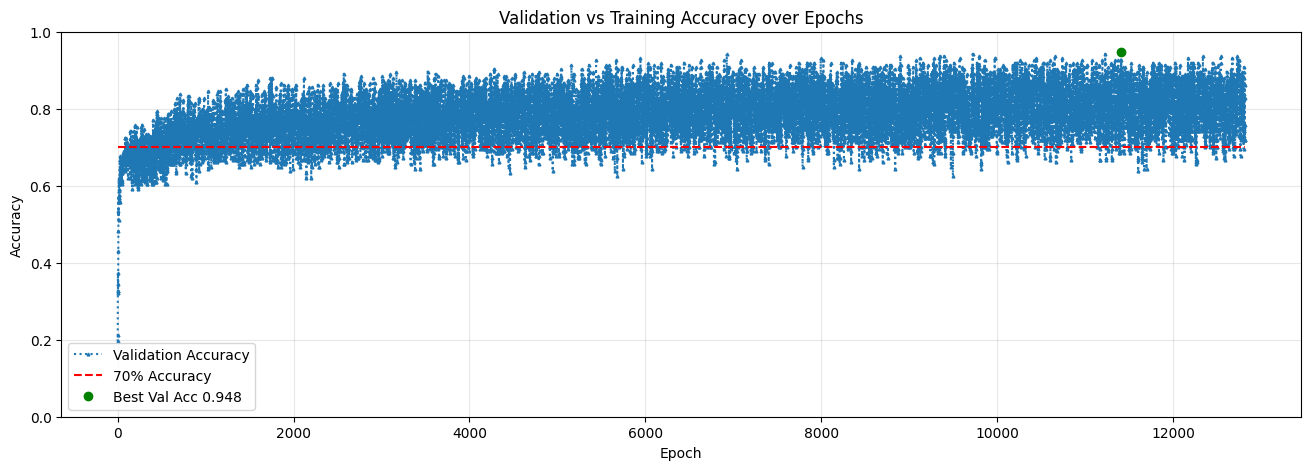


All models processed successfully!



In [ ]:
from Model_Trainer import run_multiple_models, test_trained_models 
from Utils import plot_all_results
from Dataset_torch import EEGDataset, EEGDataset_with_filters, EEGDataset_mel, EEGDataset_with_filters_for_fft
import Models
import Random_models

models_ = [
    Models.EEGClassifier,  # with notch on 2mins: 0.816, test: 0.857, on 15mins: 0.879 test: 0.903, on 60mins: 0.943 test: 0.937
    # Models.MNISTNet,     # with notch on 2mins 0.787, test: 0.811
    # Models.EEGNet,       # with notch on 2mins: 0.655, test: 0.67,
    ]

models = [
    Random_models.TCNModel_withBase,           # with notch on 2mins: 0.806, test: 0.776, on 15mins: 0.885. test: 0.909, on 60mins: 0.948 test: 0.949
                                               # with notch and fft 256 on 2mins: 0.764, test: 0.789,                            
    # Random_models.TCNModel_withBase_v2_ResidualTCNBlock,   
    # Random_models.TCNModel_withBase_v3_DepthwiseSeparableConv1D,   
    # Random_models.TCNModel_withBase_v4_DepthwiseSeparableConv1D_SEBlock1D,    

]

shared_parameters_ssvep = {
    "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA_no01_4labels.npz",
    # "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA_no01_4labels_250hz_1.5_window_size.npz",
    # "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA_no1_5labels.npz",
    # "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA_no1_5labels_250hz_1.5_window_size.npz",
    
    "DATASET_CLASS": EEGDataset_with_filters,
    # "DATASET_CLASS": EEGDataset_with_filters_for_fft,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 8), 
    
    "MAX_TIME": "00:01:00:00",
    "MODEL_KWARGS": {
        "in_channels": 8, 
        "num_classes": 4,
        # "num_classes": 5,
        "LR": 1e-3, 
        "WEIGHT_DECAY": 0.0,  
        "class_labels": [10.5, 12, 15.2, 18.1],
    }
}

# currently testing no fft, only notch 

results, test_loader = run_multiple_models(models, shared_parameters_ssvep)
# test_results = test_trained_models(results, test_loader)
# plot_all_results(results, test_results)


Testing TCNModel_withBase...


Testing: |          | 0/? [00:00<?, ?it/s]

Class 10.5 accuracy: 0.933
Class 12 accuracy: 0.870
Class 15.2 accuracy: 0.896
Class 18.1 accuracy: 0.944


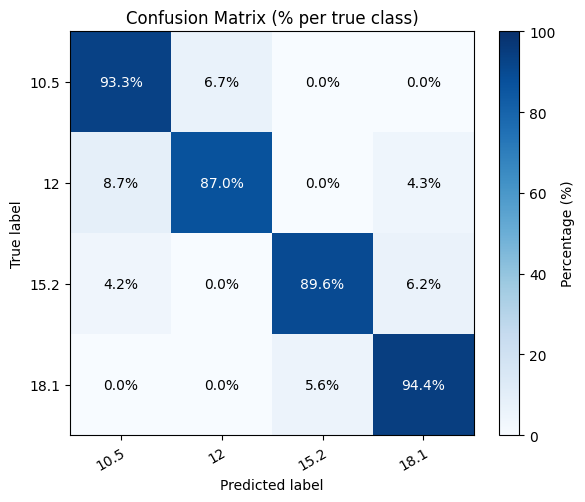

TCNModel_withBase: Test accuracy = 0.909

Testing complete for all models.


Plotting TCNModel_withBase: Test Accuracy = 0.909


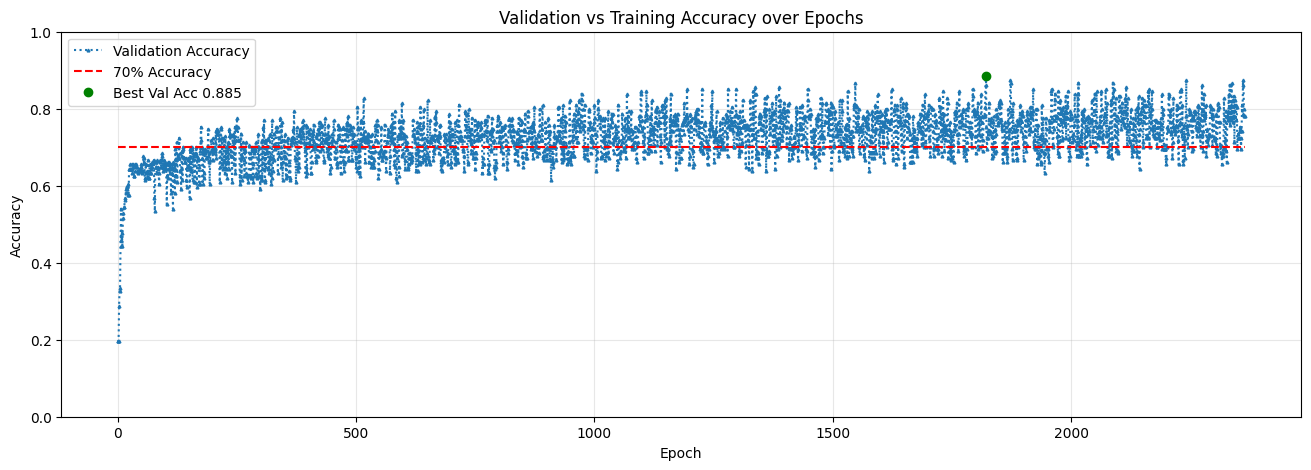

In [8]:
test_results = test_trained_models(results, test_loader)
plot_all_results(results, test_results)

## Training on eyes open closed data

In [ ]:
from Model_Trainer import run_multiple_models, test_trained_models 
from Utils import plot_all_results
from Dataset_torch import EEGDataset_with_filters
import Models
import Random_models

models_ = [
    Models.EEGClassifier,  # with notch on 2mins: 0., test: 0., on 15mins: 0. test: 0.
    ]

models = [
    Random_models.TCNModel_withBase,           # with notch on 2mins: 0.806, test: 0., on 15mins: 0.
]

shared_parameters_eyes = {
    "data_path": "datasets/numpy/eyes_filter.npz",
    
    "DATASET_CLASS": EEGDataset_with_filters,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 64), 
    
    "MAX_TIME": "00:00:02:00",
    "MODEL_KWARGS": {
        "in_channels": 64, 
        "num_classes": 2,
        "LR": 1e-3, 
        "WEIGHT_DECAY": 0.0,  
        "class_labels": [0, 1],
    }
}
results, test_loader = run_multiple_models(models, shared_parameters_eyes)

In [ ]:
test_results = test_trained_models(results, test_loader)
plot_all_results(results, test_results)

## Trying Melspetrogram with 2d CNN

In [1]:
from Model_Trainer import run_multiple_models
from Dataset_torch import EEGDataset, EEGDataset_mel, EEGDataset_mel_with_filters
import Models_2D

models = [
    # Models_2D.EEGClassifier_mel,             # 0.69 on 2mins, 0.73 on 5mins
    # Models_2D.EEGClassifier_mel_with_res,  # 0.73 on 5mins
    # Models_2D.EEGClassifier_mel_small,       # 0.70 on 2mins
    Models_2D.EEGNet_for_mel
]

shared_parameters_ssvep = {
    # "data_path": "datasets/numpy_testing/ssvep_5_filter.npz",
    # "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA.npz",
    # "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA_no0.npz",
    "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA_no01_4labels.npz",
    
    "DATASET_CLASS" : EEGDataset_mel_with_filters,
    
    "OCCIPITAL_SLICE": slice(0, 8), 
    "MAX_TIME": "00:00:02:00",
    "MODEL_KWARGS": {
        "in_channels": 8, 
        "num_classes": 4,
        "LR": 1e-3, 
        "WEIGHT_DECAY": 0.0,   
        "class_labels": [10.5, 12, 15.2, 18.1],
    }
}

results, test_loader = run_multiple_models(models, shared_parameters_ssvep)

Loading data from: datasets/numpy/ssvep_5_nofilter_GMCGA_no01_4labels.npz
Data loaded: X=(1163, 8, 500), y=(1163,)
Dataset split: Train=814, Val=174, Test=175
Dataloaders ready

Training EEGNet_for_mel...



Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3060') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type                      | Params | Mode 
--------------------------------------------------------------------
0 | criterion     | CrossEntropyLoss          | 0      | train
1 | train_acc     | MulticlassAccuracy        | 0      | train
2 | val_acc       | MulticlassAccuracy        | 0      | train
3 | test_acc      | MulticlassAccuracy        | 0      | train
4 | test_cm       | MulticlassConfusionMatrix | 0

Training: |          | 0/? [00:00<?, ?it/s]

Error training EEGNet_for_mel: mat1 and mat2 shapes cannot be multiplied (256x2048 and 960x4)

All models processed successfully!



Traceback (most recent call last):
  File "/home/gtenzing/EEG_Classification/Model_Trainer.py", line 160, in run_multiple_models
    trainer.fit(model, train_loader, val_loader)
    ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gtenzing/anaconda3/envs/skyforge/lib/python3.13/site-packages/pytorch_lightning/trainer/trainer.py", line 560, in fit
    call._call_and_handle_interrupt(
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        self, self._fit_impl, model, train_dataloaders, val_dataloaders, datamodule, ckpt_path
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "/home/gtenzing/anaconda3/envs/skyforge/lib/python3.13/site-packages/pytorch_lightning/trainer/call.py", line 49, in _call_and_handle_interrupt
    return trainer_fn(*args, **kwargs)
  File "/home/gtenzing/anaconda3/envs/skyforge/lib/python3.13/site-packages/pytorch_lightning/trainer/trainer.py", line 598, in _fit_impl
    self._run(model, ckpt_path=ckpt_p

In [ ]:
from Model_Trainer import test_trained_models 
from Utils import plot_all_results
# test_results = test_trained_models(results, test_loader)
# plot_all_results(results, test_results)

## Plot any saved model 

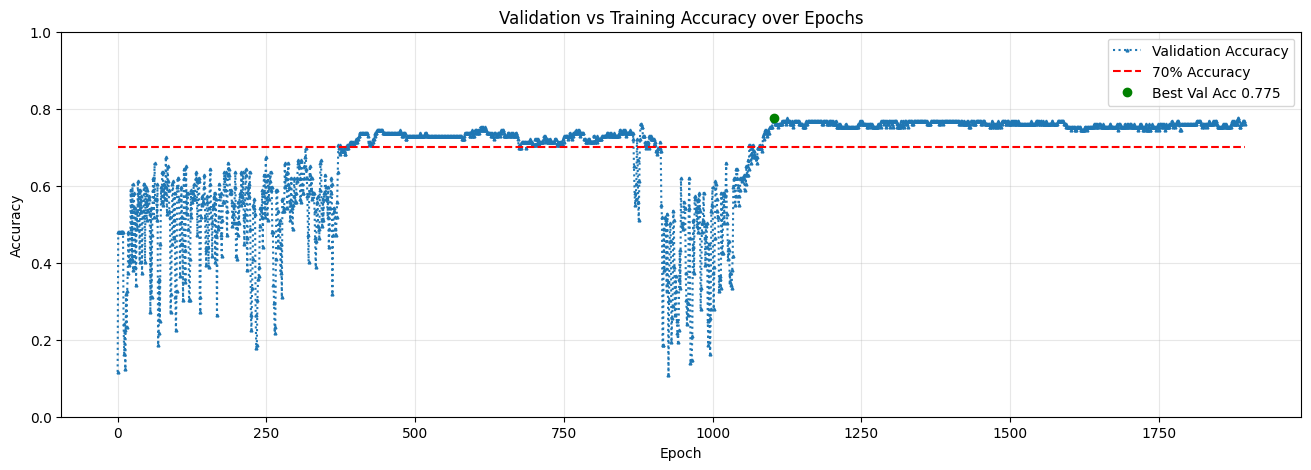

In [2]:
from Utils import plot_training_metrics

csv_path = "logs/EEGClassifier/version__77/metrics.csv"
plot_training_metrics(csv_path)